# Question 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('./Datasets/Dataset for regression/CarSeats_dataset_regression.csv')
df.head()

,No,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Simple Linear Regression Analysis
Let's first visualize the relationship between Sales and Population

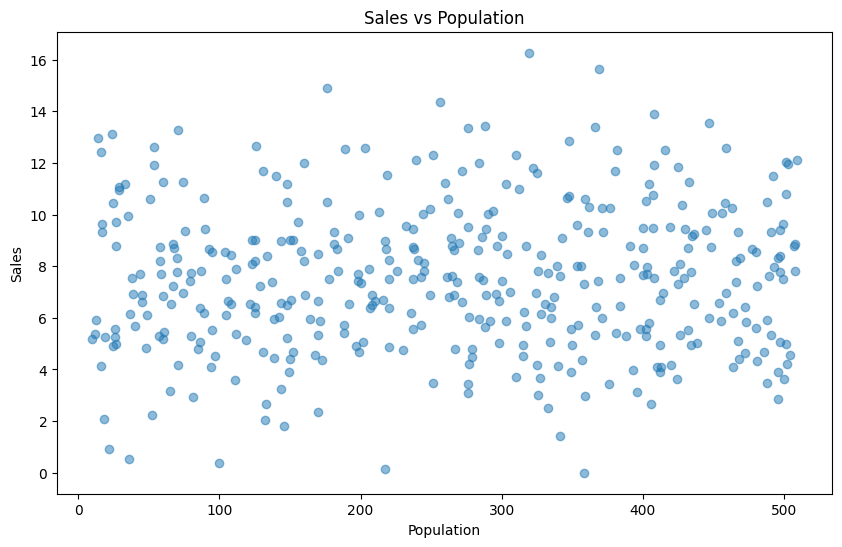

In [ ]:

X = df[['Population']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Sales'], alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Sales')
plt.title('Sales vs Population')
plt.show()

Intercept: 6.6909
Coefficient: 0.0025
R-squared: -0.0742
MSE: 9.1088
RSS: 1093.0514


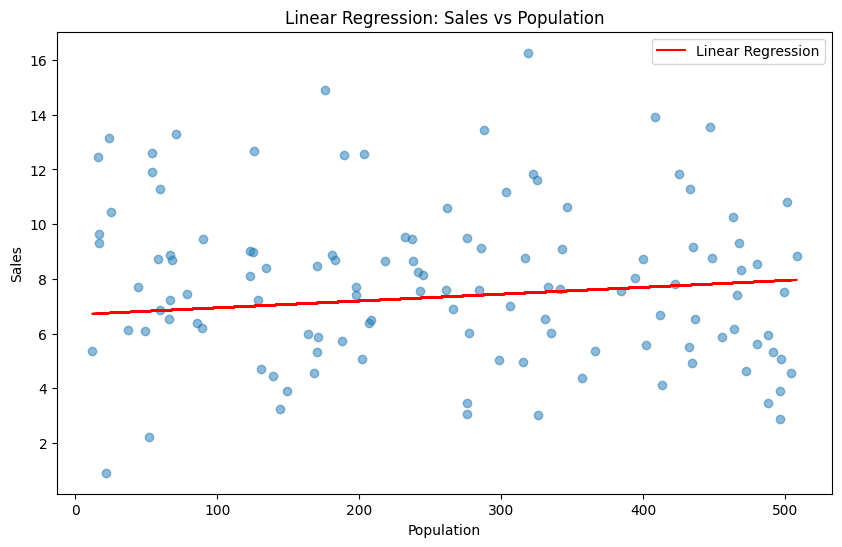

In [29]:
# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Print results
print(f'Intercept: {linear_model.intercept_:.4f}')
print(f'Coefficient: {linear_model.coef_[0]:.4f}')
print(f'R-squared: {r2_score(y_test, y_pred_linear):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_linear):.4f}')
print(f'RSS: {np.sum((y_test - y_pred_linear) ** 2):.4f}')

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.xlabel('Population')
plt.ylabel('Sales')
plt.title('Linear Regression: Sales vs Population')
plt.legend()
plt.show()

The R2 score is weak, indicating that data is not linearly related

## Polynomial Regression Analysis

Degree 1 - Training RSS: 2109.6959
Degree 2 - Training RSS: 2109.0008
Degree 3 - Training RSS: 2107.0998
Degree 4 - Training RSS: 2091.2879
Degree 5 - Training RSS: 2091.0476
Degree 6 - Training RSS: 2090.2334
Degree 7 - Training RSS: 2093.7414


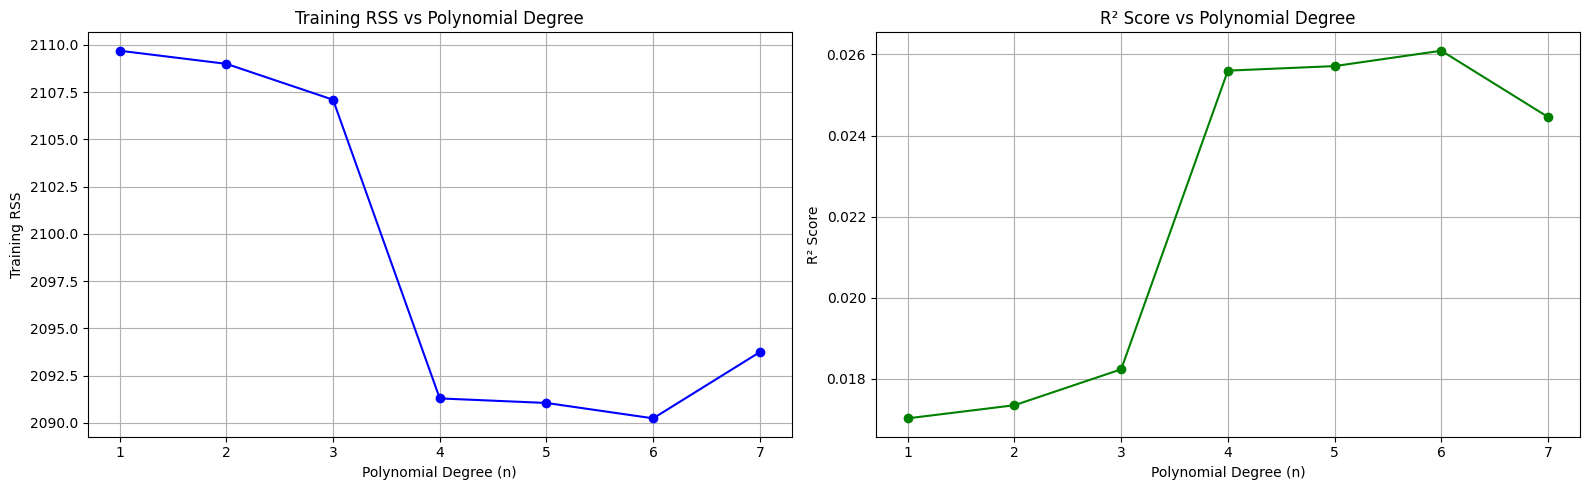

In [30]:
from sklearn.preprocessing import PolynomialFeatures

RANGE = 8

# Store training RSS for each degree
train_rss = []

# Store training R2 scores for each degree
train_r2_scores = []

# We'll use the training set from earlier (X_train, y_train)
for degree in range(1, RANGE):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    # Fit the linear model to the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train_poly)

    # Compute training RSS
    rss = np.sum((y_train - y_train_pred) ** 2)
    r2 = r2_score(y_train, y_train_pred)
    train_rss.append(rss)
    train_r2_scores.append(r2)
    print(f'Degree {degree} - Training RSS: {rss:.4f}')

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 5))

# Plot training RSS vs degree
plt.subplot(1, 2, 1)
plt.plot(range(1, RANGE), train_rss, marker='o', linestyle='-', color='blue')
plt.title('Training RSS vs Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Training RSS')
plt.grid(True)

# Plot R2 scores vs degree
plt.subplot(1, 2, 2)
plt.plot(range(1, RANGE), train_r2_scores, marker='o', linestyle='-', color='green')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

we see that degree 6 is the best fit for this data, with the max r2 score. After increasing till 6, it again reduces

the same can be inferred for the RSS, which is the least for degree 6 polynomial

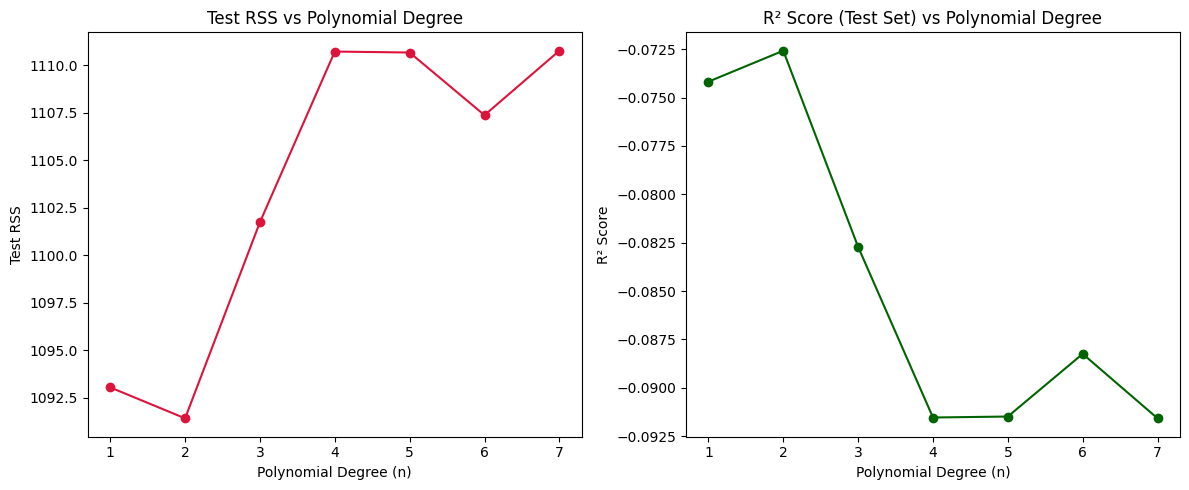

In [31]:
test_rss = []
r2_scores_test = []

for degree in range(1, RANGE):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_test_pred = model.predict(X_test_poly)
    rss = np.sum((y_test - y_test_pred) ** 2)
    r2 = r2_score(y_test, y_test_pred)

    test_rss.append(rss)
    r2_scores_test.append(r2)

# Plotting
plt.figure(figsize=(12, 5))

# RSS Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, RANGE), test_rss, marker='o', color='crimson')
plt.title('Test RSS vs Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Test RSS')

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, RANGE), r2_scores_test, marker='o', color='darkgreen')
plt.title('R² Score (Test Set) vs Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

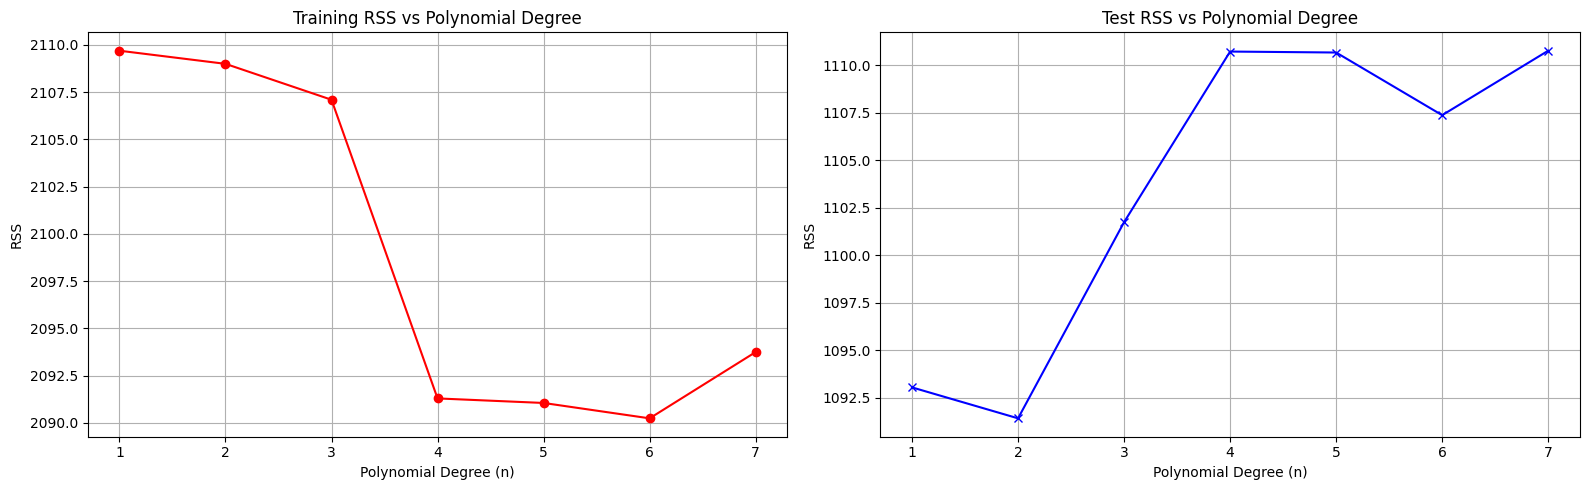

In [ ]:
# Initialize empty lists for RSS values
train_rss = []
test_rss = []

degrees = range(1, RANGE)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_rss.append(np.sum((y_train - y_train_pred) ** 2))
    test_rss.append(np.sum((y_test - y_test_pred) ** 2))

# Plotting
plt.figure(figsize=(16, 5))

# Training RSS Plot
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rss, 'o-r')
plt.xlabel("Polynomial Degree (n)")
plt.ylabel("RSS")
plt.title("Training RSS vs Polynomial Degree")
plt.grid(True)

# Test RSS Plot
plt.subplot(1, 2, 2)
plt.plot(degrees, test_rss, 'x-b')
plt.xlabel("Polynomial Degree (n)")
plt.ylabel("RSS")
plt.title("Test RSS vs Polynomial Degree")
plt.grid(True)

plt.tight_layout()
plt.show()